# Matplotlib

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

## Visualization

I'm not an expert on visualization and it is a huge topic, so I'm only going to cover enough of the basics for the examples in this repository. I'll be using a system called [matplotlib](https://matplotlib.org/), it isn't particularly exciting, but it is fairly flexible and very widely used. With a little coersion, you can usually get it to do what you need for publications etc.

### Matplotlib

Matplotlib is the defacto standard for visualization in python. It has been around for a long time, and there are numerous more modern systems appearing but it benefits from a large userbase, good documentation, [tutorials](https://matplotlib.org/3.1.0/tutorials/index.html#) and lots of easily copied examples!

Matplotlib is a module like everything else, and because it is so widly used there's a standard import invocation. `matplotlib.pyplot` or `plt` is the state-based interface to matplotlib. If you've ever plotted in MATLAB it should be fairly familiar (I think that's where the MAT in matplotlib comes from). We will be using it almost exclusively.

Matplotlib is portable across systems. For this to work it uses the concept of "backends" which do the actual rendering of figures. These backends vary by operating system and other factors and all you need to do is tell matplotlib which one you would like to use. For the notebook interface there is a special magic command calld `%matplotlib` which will do this for us. Most backends are hooks into specific windowing libraries or other utilities, but `inline` is a special backend which lets you display the results directly in the notebook.

If you forget to specify the backend, matplotlib won't complain, but your output will be missing (matplotlib will return an object but it won't render anything. One interesting alternative to `inline` is `notebook` which is supposed to deliver an amount of interactivity (zoom, resize etc.) but it depends on a quick kernel connection so sometimes it can be pretty slow. `inline` is normally enough for quick explorations and the visualization landscape is always changing with projects such as 
 
  * [altair](https://altair-viz.github.io/)
  * [plotly](https://plot.ly/python/ipython-notebook-tutorial/)
  * [d3](https://d3js.org/)
  
Matplotlib actually has two interfaces for plotting, one is a more traditional stateful interace and the other takes an object oriented approach. We'll stick to the second one because while it is a little bit more verbose, it is more flexible and widely used. If you are looking at examples, you can normally tell which one they are using by checking to see if the call `plt.plot` or `ax.plot`. The OO interface gives you explicit figure and axes objects to attach things to so it doesn't depend as strongly on current cell context (this is useful if you want to modify more than one plot)

### Basic Plotting

We'll start with a line plot.

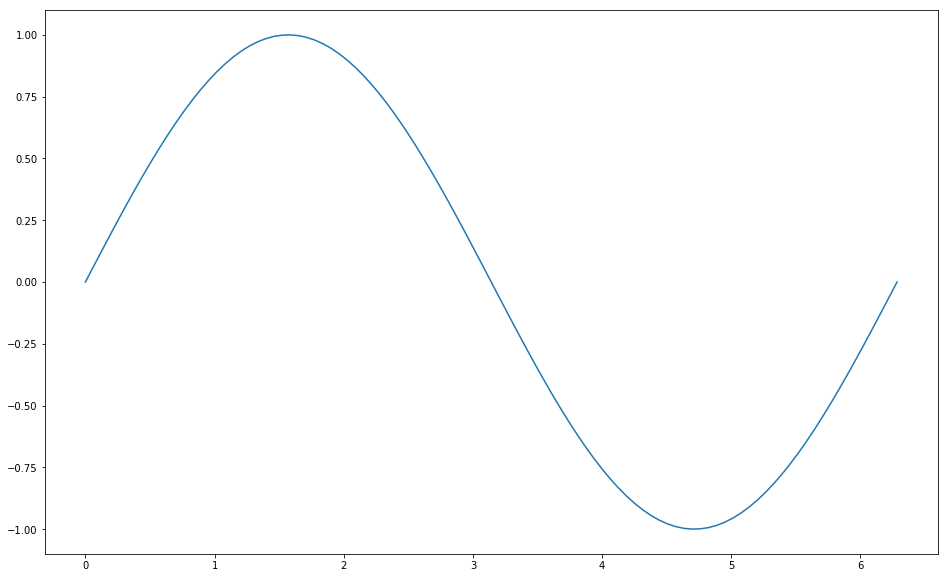

In [9]:
x = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))

The first line is just giving us some numers to plot. The second line calls the subplots function with an argument of 1. If you look at the documentation for that function, it says that this should give is a single figure (canvas) and one set of axes. Later on, we will add other values to make more complicated plots.

Within a single axes object we can plot multiple things, this will overlay the plots

In [2]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot

`plot` takes a huge selection of [keyword arguments](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html). We can change line widths, colors, types, add  labels etc.

In [3]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot with `label=` for each and add a lagend to the axis

In [4]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same figure with labels and different `linetype` and `linewidth` values


In [5]:
# Same plot, but set a title on the axis, use the fontdict to change the fontsize
# fontdict={'fontsize': 16}


There are lots of ways to [specify color](https://matplotlib.org/3.1.0/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py).

**Exercise**: You can modify the scale of each axis, the tick positions, lables etc. Via the `ax.set_` methods. Take a look at the documentation then , tic position almost everything via the axes, take a look at `ax.set<TAB>` and add lables for the `x` and `y` axes.

### Scatter plots


In [6]:
# Create a scatter plot of x vs np.random.randn(len(x) with `marker='s'`)

**Exercise**: Look at the help and figure out how to change the marker style to something else (diamonds), also change their size and color.

One interesting variation is to use colors and marker size to encode more information, e.g.

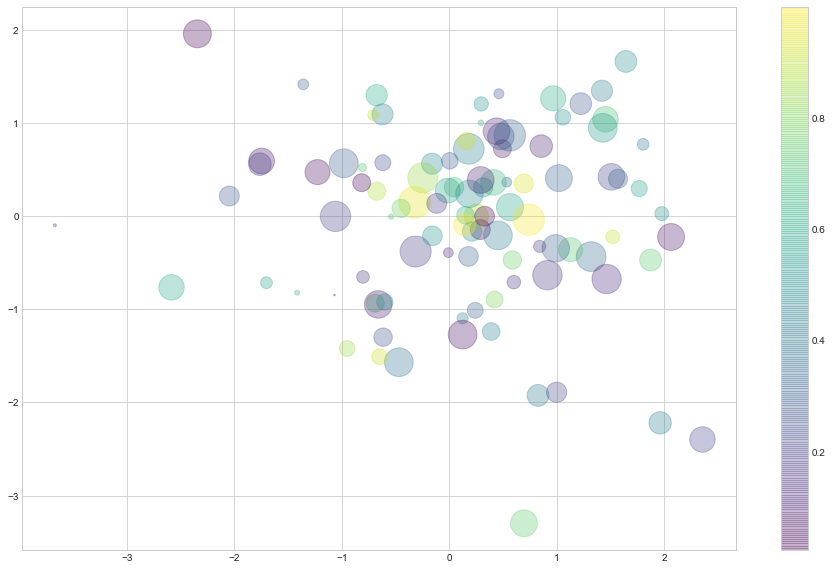

In [45]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

fig, ax = plt.subplots(1)
s = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
fig.colorbar(s, ax = ax)

### Errorbar Plots

Everything should have error bars! Matplotlib has a special plotting utility to make showing them easy

<ErrorbarContainer object of 3 artists>

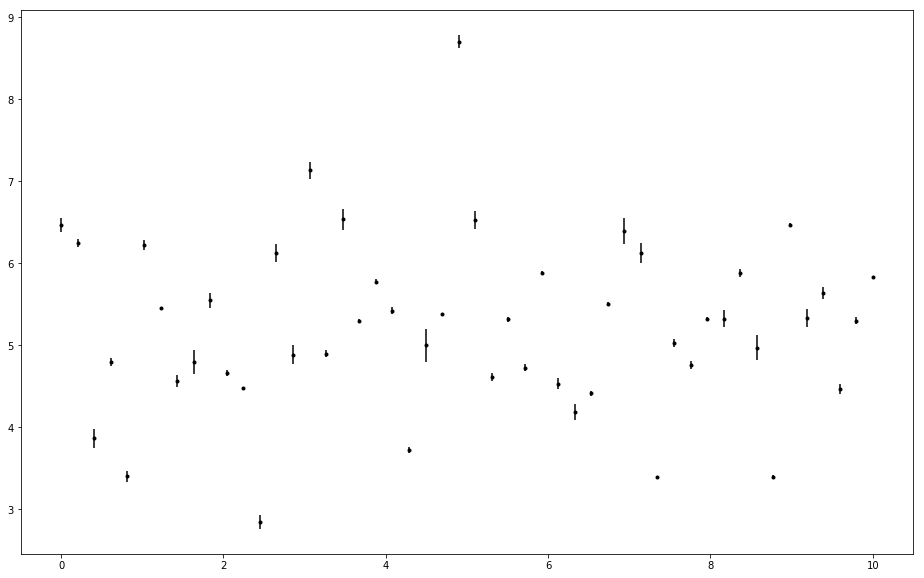

In [9]:
x = np.linspace(0, 10, 50)
y = 5 + np.random.randn(50)
yerr = 0.1 * np.random.randn(50)

fig, ax = plt.subplots(1)
ax.errorbar(x, y, yerr=yerr, fmt='.k')

This could use a little work ... let's tweak some features

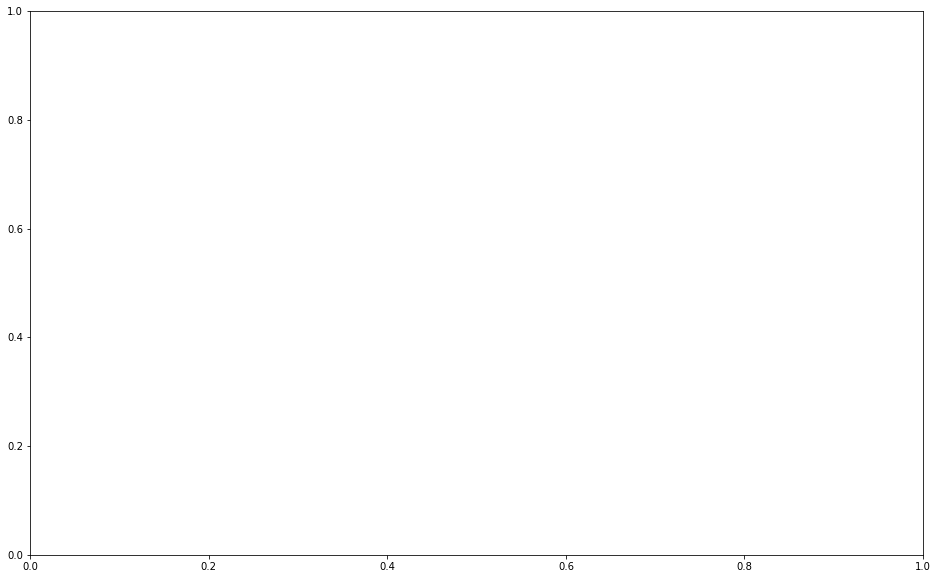

In [11]:
x = np.linspace(0, 10, 10)
y = 5 + 0.5 * np.random.randn(10)
yerr = 0.3 * np.random.randn(10)

fig, ax = plt.subplots(1)

# Set the ylim to (0,10) and change the capsize, markersize, ecolor etc.


### Barplots/Histograms


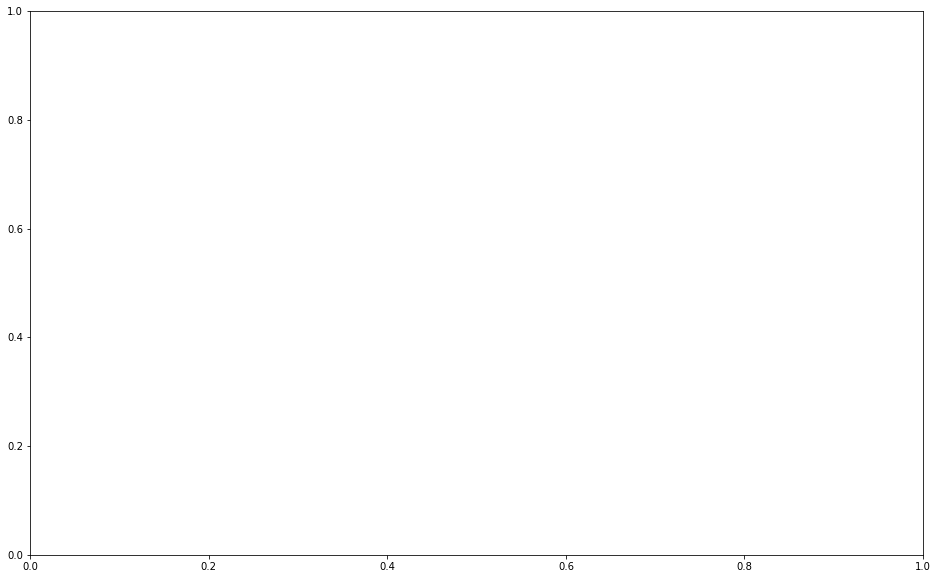

In [12]:
fig, ax = plt.subplots()

# Show a histogram of `np.random.randn(1000)`


This is really handy for basic exploration, and you can tweak the bin sizes etc. as needed. In addition to the plots, you also get back a tuple with the bin counts and locations 

In [13]:
# Same plot, but with
#  * 20 bins
#  * alpha of 0.6
#  * Green bars
#  * Black lines around the bars


A stacked bar plot with error bars

<BarContainer object of 5 artists>

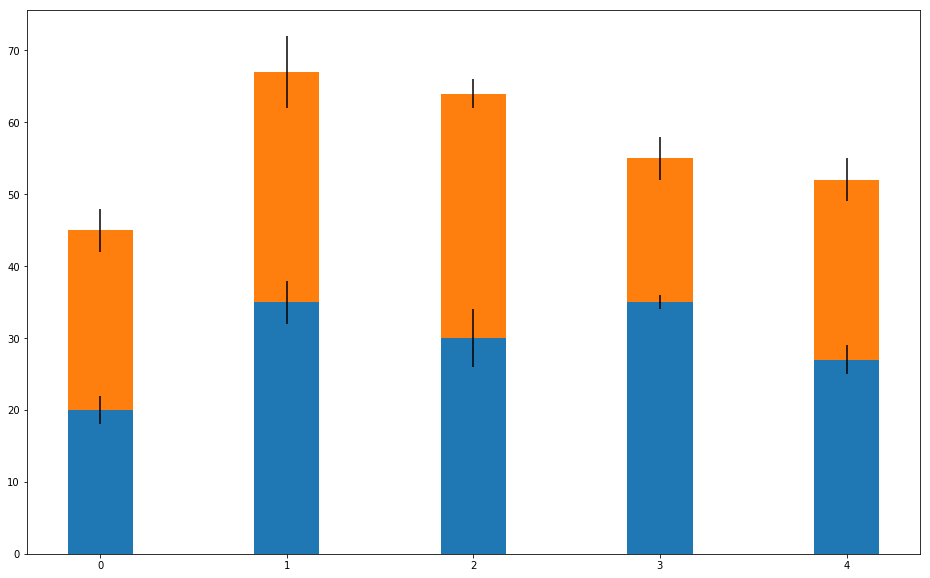

In [15]:
N = 5
mMeans = (20, 35, 30, 35, 27)
wMeans = (25, 32, 34, 20, 25)
mStd = (2, 3, 4, 1, 2)
wStd = (3, 5, 2, 3, 3)

fig, ax = plt.subplots(1)
ax.bar(np.arange(N), mMeans, width=0.35, yerr = mStd)
ax.bar(np.arange(N), wMeans, bottom=mMeans, width=0.35, yerr = wStd)

A 2d histogram

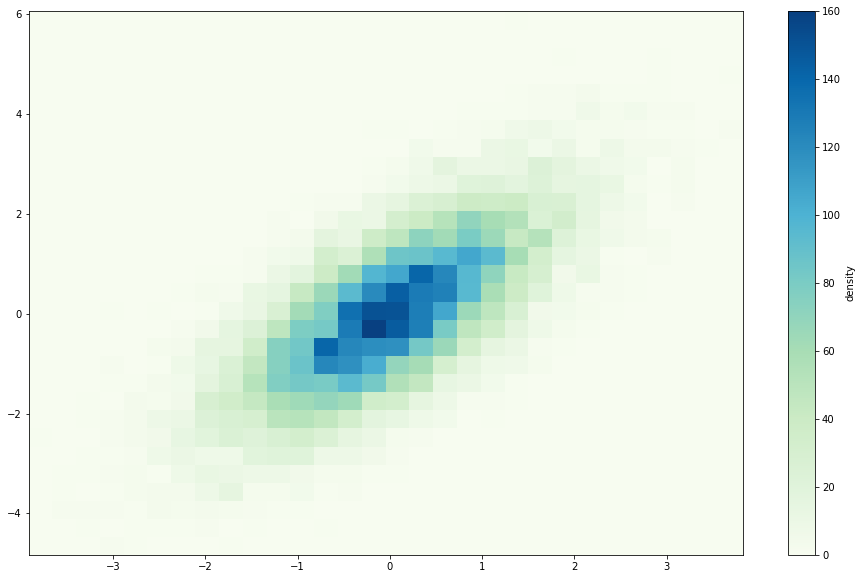

In [16]:
fig, ax = plt.subplots(1)

x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 2]], 10000).T
(_, _, _, h2) = ax.hist2d(x, y, bins=30, cmap='GnBu')
cb = fig.colorbar(h2, ax=ax)
cb.set_label('density')

### Contour plots



In [100]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
    
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

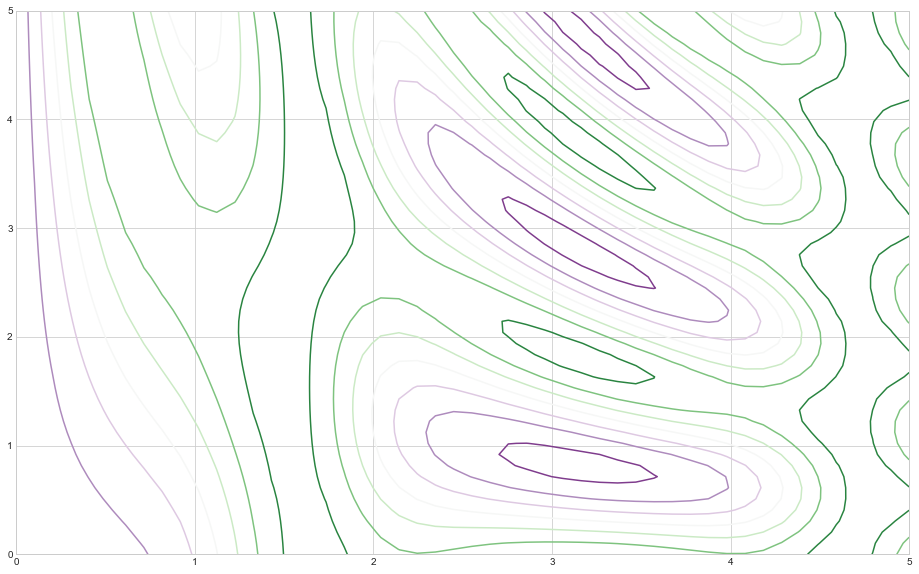

In [101]:
fig, ax = plt.subplots(1)
ax.contour(X, Y, Z, cmap='PRGn')

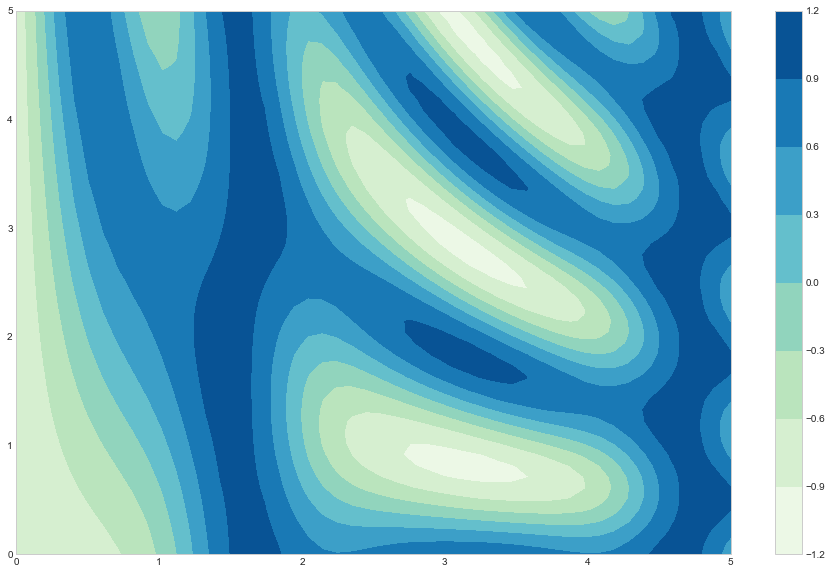

In [102]:
fig, ax = plt.subplots(1)
cf = ax.contourf(X, Y, Z, cmap='GnBu')
fig.colorbar(cf, ax = ax)

## Subplots

For publications you might want to have multiple plots next to each other, this is where `plt.subplots()` becomes more than boilerplate...

Text(0, 0.5, 'Deviation')

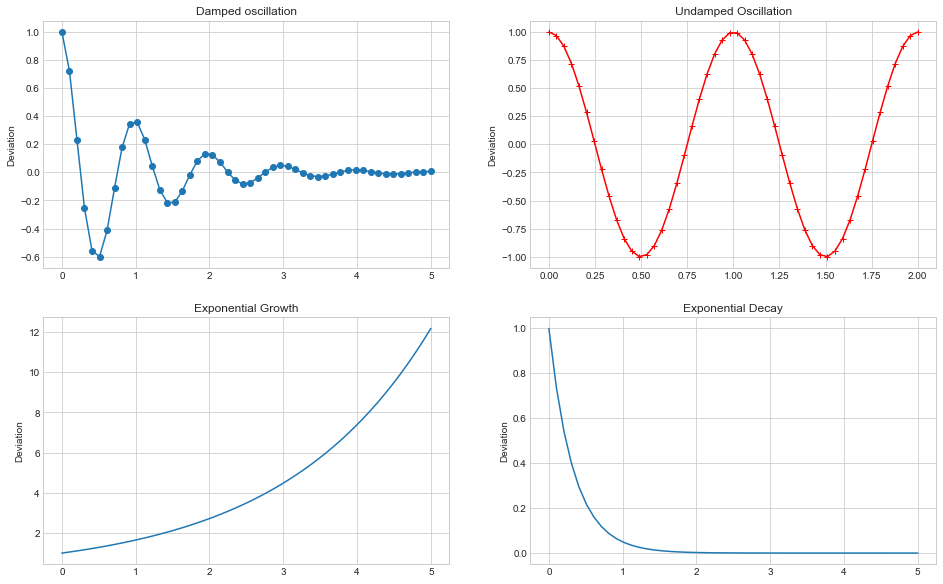

In [112]:
fig, ax = plt.subplots(nrows=2, ncols=2)

x1 = np.linspace(0., 5.)
x2 = np.linspace(0., 2.)

y1 = np.cos(2*np.pi * x1) * np.exp(-x1)
y2 = np.cos(2*np.pi * x2)

ax[0,0].plot(x1, y1, 'o-')
ax[0,0].set_title('Damped oscillation')
ax[0,0].set_ylabel('Deviation')

ax[0,1].plot(x2, y2, '+-', color='red')
ax[0,1].set_title('Undamped Oscillation')
ax[0,1].set_ylabel('Deviation')

ax[1,0].plot(x1, np.exp(0.5*x1))
ax[1,0].set_title('Exponential Growth')
ax[1,0].set_ylabel('Deviation')

ax[1,1].plot(x1, np.exp(-3*x1))
ax[1,1].set_title('Exponential Decay')
ax[1,1].set_ylabel('Deviation')


If you need some inspiration, you can find some useful examples in [this gallery](https://matplotlib.org/3.1.0/gallery/index.html).

There is also a whole language of annotations and patches for marking up your plots to highligh features etc.

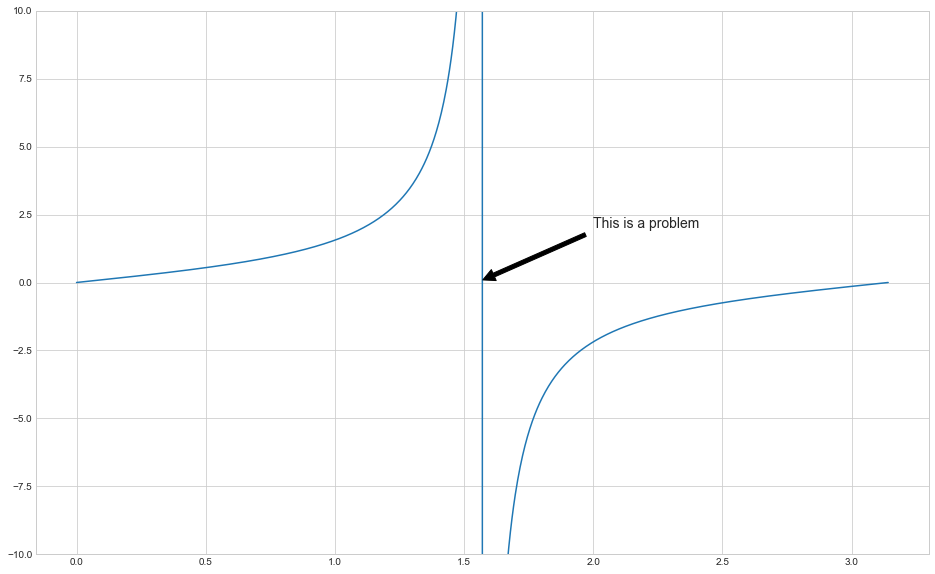

In [130]:
x = np.linspace(0, np.pi, 1000)
y = np.tan(x)

fig, ax = plt.subplots(1)
ax.plot(x, y)
ax.set_ylim(-10,10)

_ = ax.annotate("This is a problem", 
            xy=(1.55,0), # Coordinate locating the arrow 
            xytext=(2,2), # Location of the text
            arrowprops={'facecolor': 'k', 'shrink': 0.05},
            size=14
           )

## Style

Matplotlib has a distinctive style, thankfully they let you specify stylesheets to change things up a bit. Take a look at `plt.style.available` and try out some alternatives. You can try them out with the context system (`with` keyword)

In [137]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

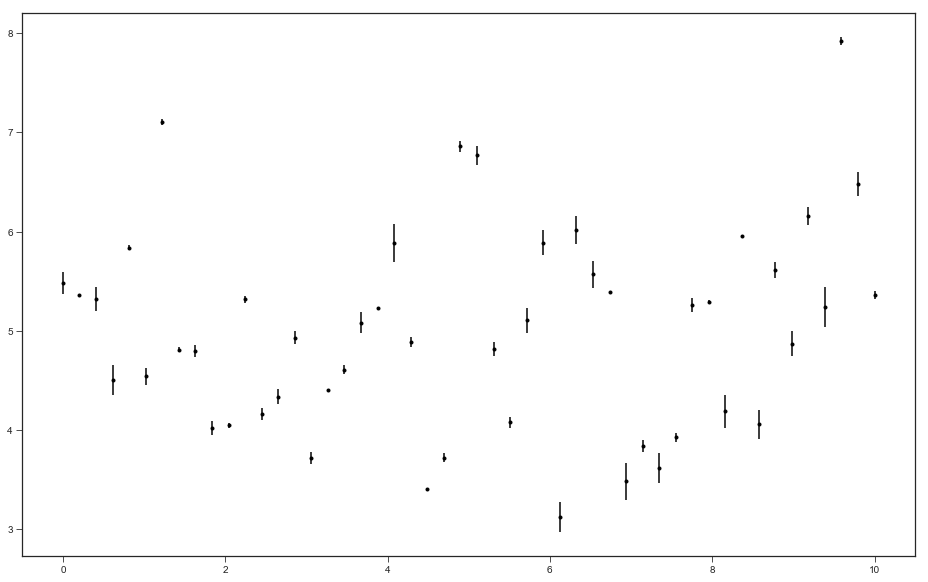

In [140]:
with plt.style.context('seaborn-ticks'):
    x = np.linspace(0, 10, 50)
    y = 5 + np.random.randn(50)
    yerr = 0.1 * np.random.randn(50)

    fig, ax = plt.subplots(1)
    ax.errorbar(x, y, yerr=yerr, fmt='.k')

## Other stuff

Matplotlib does have some support for 3d plotting, mapping, and animation but it can be a bit fiddly

